<a href="https://colab.research.google.com/github/lakhya-jyoti/tensorflow/blob/main/Celsius_to_Fahrenheit_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convert from celcius to fahreneheit**

where the approximate formula is
f = c * 1.8 + 32

we will give Tensorflow some sample *Celsius* Values and their corresponding output Farenheit Values. Then we will train a model that figures out the above formula through the training process.


# **Import dependencies**

In [29]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

import numpy as np


# **Set up training data**

Here we create two lists celsius_q and fahrenheit_a that we can use to train our model


In [30]:
celsius_q =  np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


# **Create our model**

**Build a layer**

We'll call the layer 10 and create it by instantiating tf. keras. layers. Dense with the following configuration:
* input_ shape=[1] - This specifies that the input to
this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celcius.
* units=1 - This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the later would need to match the input_shape of the next layer.)

In [31]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Assemble layers into the model**

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.
This model has just a single layer,
l0.


In [32]:
model = tf.keras.Sequential([l0])

# **Compile the model, with loss and optimizer functions**

* Loss function - A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".
* Optimizer function - A way of adjusting internal values in order to reduce the loss.

In [33]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

# **Train the Model**

by using the fit model

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are intially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.
This cycle of calculate, compare, adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs. The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.

In [34]:
history = model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose = False)
print("Finished training the model")

Finished training the model


# **Display Training Statistics**

The fit method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in fahrenheit_a.


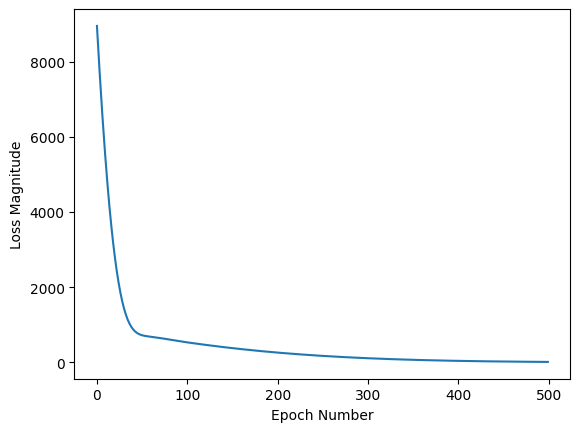

In [35]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])


# **Use the model to predict values**

if the Celsius value is 200, farhrenheit value will be 100 * 1.8 + 32 = 212

In [36]:
print(model.predict(np.array([100.0]))) # Convert the list [100.0] to a NumPy array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[211.27074]]


# **Review**
* We created a model with dense layer
* Trained it with 3500 examples (7 pairs, over 500 epochs)

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value.
